In [16]:
import docx
import spacy
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Load the Word document
doc = docx.Document("data/Raptor Contract.docx")

# Extract text from paragraphs
text = ""
for paragraph in doc.paragraphs:
    text += paragraph.text + "\n"

# Process the text using spaCy
doc = nlp(text)

# Extract sentences
sentences = [sent.text for sent in doc.sents]

# Count occurrences of sentences
sentence_counts = Counter(sentences)

# Identify duplicate sentences (sentences with count > 1)
duplicates = {sentence: count for sentence, count in sentence_counts.items() if count > 1}

# Print each duplicate sentence along with the number of duplications
for sentence, count in duplicates.items():
    print(f"Sentence: '{sentence}' - Duplications: {count}")


In [18]:
from docx import Document
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Load the Word document
doc = Document("data/Robinson Advisory.docx")

# Extract text from paragraphs
essay = ""
for paragraph in doc.paragraphs:
    essay += paragraph.text + "\n"

# Process the essay text
doc = nlp(essay)

# Extract individual sentences
single_sentences_list = [sent.text for sent in doc.sents]

print(f"{len(single_sentences_list)} sentences were found")


67 sentences were found


In [19]:
len(single_sentences_list[0])

351

In [20]:

import re
import statistics
import scipy.stats as stats
import numpy as np

# Calculate the lengths of all sentences
sentence_lengths = [len(sentence) for sentence in single_sentences_list]

min_length = min(sentence_lengths)
max_length = max(sentence_lengths)
average_length = sum(sentence_lengths) / len(single_sentences_list)
std_deviation = statistics.stdev(sentence_lengths)
variance = statistics.variance(sentence_lengths)
median_length = statistics.median(sentence_lengths)
mode_length = statistics.mode(sentence_lengths)
percentile_25 = np.percentile(sentence_lengths, 25)
percentile_50 = np.percentile(sentence_lengths, 50)
percentile_75 = np.percentile(sentence_lengths, 75)
percentile_90 = np.percentile(sentence_lengths, 90)

# Calculate advanced statistics
skewness = stats.skew(sentence_lengths)
kurtosis = stats.kurtosis(sentence_lengths)
iqr = np.percentile(sentence_lengths, 75) - np.percentile(sentence_lengths, 25)
cv = (std_deviation / average_length) * 100
data_range = max_length - min_length
mad = np.median(np.abs(sentence_lengths - np.median(sentence_lengths)))

print(f"Minimum sentence length: {min_length} characters")
print(f"Maximum sentence length: {max_length} characters")
print(f"Average sentence length: {average_length} characters")
print(f"Standard deviation of sentence lengths: {std_deviation}")
print(f"Variance of sentence lengths: {variance}")
print(f"Median sentence length: {median_length} characters")
print(f"Mode sentence length: {mode_length} characters")
print(f"25th percentile sentence length: {percentile_25} characters")
print(f"50th percentile sentence length: {percentile_50} characters")
print(f"75th percentile sentence length: {percentile_75} characters")
print(f"90th percentile sentence length: {percentile_90} characters")
print(f"Skewness of sentence lengths: {skewness}")
print(f"Kurtosis of sentence lengths: {kurtosis}")
print(f"Interquartile range (IQR) of sentence lengths: {iqr}")
print(f"Coefficient of variation (CV) of sentence lengths: {cv}%")
print(f"Range of sentence lengths: {data_range} characters")
print(f"median absolute deviation of sentence lengths: {mad} characters")


Minimum sentence length: 10 characters
Maximum sentence length: 594 characters
Average sentence length: 210.8507462686567 characters
Standard deviation of sentence lengths: 138.38771334182852
Variance of sentence lengths: 19151.1592039801
Median sentence length: 192 characters
Mode sentence length: 217 characters
25th percentile sentence length: 129.5 characters
50th percentile sentence length: 192.0 characters
75th percentile sentence length: 266.5 characters
90th percentile sentence length: 385.2 characters
Skewness of sentence lengths: 0.9599552609110755
Kurtosis of sentence lengths: 0.49585590059410345
Interquartile range (IQR) of sentence lengths: 137.0
Coefficient of variation (CV) of sentence lengths: 65.63302041411843%
Range of sentence lengths: 584 characters
median absolute deviation of sentence lengths: 66.0 characters


In [21]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]

In [11]:

def combine_sentences(sentences, buffer_size=2):
    sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(sentences)]
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences


In [14]:
s = [
    "Gather all the necessary ingredients for baking a cake.",
    "Check the recipe and make sure you have flour, .",
    "Preheat the oven to 350°F (175°C).",
    "To prepare the cake batter, cream the butter and sugar together.",
    "Add eggs, one at a time, mixing well after each addition.",
    "Alternate adding the dry ingredients and milk in three parts, .",
    "Pour the batter into a greased 9x13-inch baking dish.",
    "Bake the cake for 25-30 minutes, or until a toothpick inserted .",
    "Let the cake cool in the pan for 10 minutes, then transfer it .",
]

In [15]:
combine_sentences(s)

[{'sentence': 'Gather all the necessary ingredients for baking a cake.',
  'index': 0,
  'combined_sentence': 'Gather all the necessary ingredients for baking a cake. Check the recipe and make sure you have flour, . Preheat the oven to 350°F (175°C).'},
 {'sentence': 'Check the recipe and make sure you have flour, .',
  'index': 1,
  'combined_sentence': 'Gather all the necessary ingredients for baking a cake. Check the recipe and make sure you have flour, . Preheat the oven to 350°F (175°C). To prepare the cake batter, cream the butter and sugar together.'},
 {'sentence': 'Preheat the oven to 350°F (175°C).',
  'index': 2,
  'combined_sentence': 'Gather all the necessary ingredients for baking a cake. Check the recipe and make sure you have flour, . Preheat the oven to 350°F (175°C). To prepare the cake batter, cream the butter and sugar together. Add eggs, one at a time, mixing well after each addition.'},
 {'sentence': 'To prepare the cake batter, cream the butter and sugar together

In [23]:
sentences = combine_sentences(sentences)


In [24]:
sentences

[{'sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor").\n\n',
  'index': 0,
  'combined_sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor").\n\n Whereas,\tAdvisor has expertise and/or knowledge and/or relationships, which are relevant to the Company’s business and the Company has asked Advisor to provide it with certain Advisory services, as described in this Agreement; and\n

Embed using scapy

In [25]:
import spacy

# Load the spaCy embedder
nlp = spacy.load('en_core_web_sm')

# Create embedding vectors for the input sentences using the spaCy embedder
embeddings = [nlp(sentence).vector for sentence in [x['combined_sentence'] for x in sentences]]

In [26]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [28]:
distances, sentences = calculate_cosine_distances(sentences)

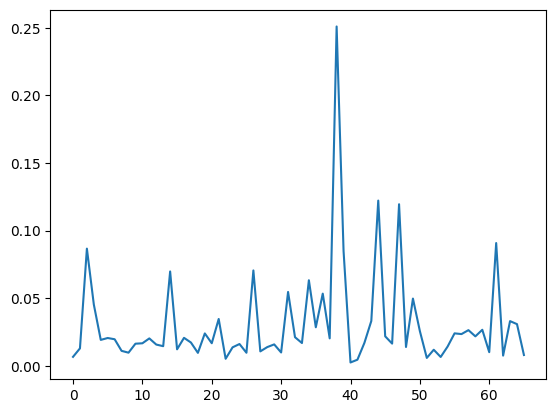

In [29]:
import matplotlib.pyplot as plt

plt.plot(distances)

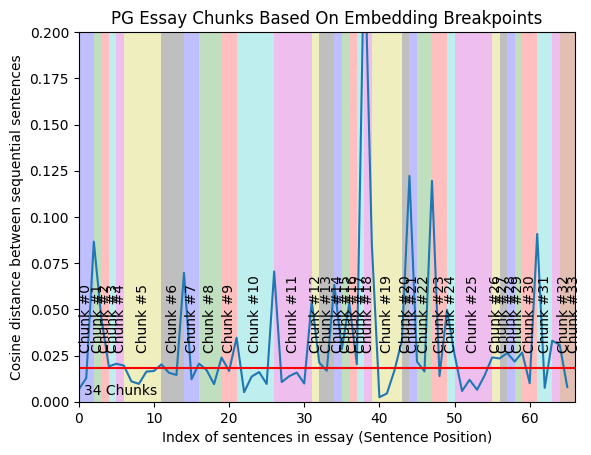

In [30]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 50
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [32]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [33]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
ADVISORY SERVICES AGREEMENT

This Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (t
...
scribed in this Agreement; and
Whereas, 	Advisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.

 NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:


Chunk #1
Services:  
Advisor shall provide to the Company, as an independent contractor, software development services, and / or any other services as agreed by the parties from time to time (the “Services”).
...
Services:  
Advisor shall provide to the Company, as an independent contractor, software development services, and / or any other services as agreed by the parties from time to time (the “Services”).




In [42]:
len(chunks)

34

## checking for empty chunks and drops them

In [75]:
empty_chunks = [chunk for chunk in chunks if not chunk]
print(f"There are {len(empty_chunks)} empty chunks in the list")

There are 0 empty chunks in the list


In [76]:
chunks = [chunk for chunk in chunks if chunk]

In [77]:
empty_chunks = [chunk for chunk in chunks if not chunk]
print(f"There are {len(empty_chunks)} empty chunks in the list")

There are 0 empty chunks in the list


In [1]:
from dotenv import load_dotenv
import os
load_dotenv
from langchain_community.embeddings.spacy_embeddings import SpacyEmbeddings


In [2]:
embeddings = SpacyEmbeddings(model_name="en_core_web_sm")

In [80]:
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
vectorstore = FAISS.from_texts(
    chunks, embedding=embeddings
)

In [82]:
vectorstore.save_local("Robinson Advisory_indexes")

In [3]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
vectorstore = FAISS.load_local("Robinson Advisory_indexes", embeddings)
retriever = vectorstore.as_retriever(search_kwargs={"k" : 20}) 

In [5]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CohereRerank
import os 
from dotenv import load_dotenv
load_dotenv
compressor = CohereRerank()
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

In [6]:
 
relevant_docs = compression_retriever.get_relevant_documents("Jack Robinson")
relevant_docs

[Document(page_content='ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor").\n\n Whereas,\tAdvisor has expertise and/or knowledge and/or relationships, which are relevant to the Company’s business and the Company has asked Advisor to provide it with certain Advisory services, as described in this Agreement; and\nWhereas, \tAdvisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.\n\n NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:\n\n', metadata={'relevance_score': 0.99821085}),
 Document(page_content='Notices: Notices under this Agreement shall be delivered to the party’s email address as follows: Company: info@cloudcorp.com, Advisor: jackrob

In [7]:
from langchain_core.prompts import ChatPromptTemplate
template = """<human>: As a legal contract advisor, your role is pivotal in navigating the complexities of the contract clause agreement. Your responsibility extends beyond mere interpretation; it encompasses a meticulous analysis and strategic elucidation of the user's query based on the given {context}. To accomplish this effectively, consider the following steps:

1. Contextual Understanding: Begin by immersing yourself in the provided contract clause or {context}, grasping the intricacies of the terms, conditions, and potential implications involved. Pay particular attention to any ambiguous language or clauses that may pose risks to your client.

2. User Query Analysis: Carefully dissect the user's question within the {context} or the contract clause. Identify any specific clauses or provisions that the question pertains to and analyze their impact on your client's interests or question.

3. Comprehensive Response: Craft a response that addresses the user's query comprehensively, taking into account the nuances of the contract clause. Provide detailed explanations and recommendations, ensuring that your client is fully informed of their rights and obligations under the agreement.

4. Risk Mitigation: As you formulate your response, prioritize the mitigation of risks inherent in the contract clause. Identify potential pitfalls or areas of concern and propose proactive measures to safeguard your client's interests and minimize their exposure to liability.

5. Strategic Communication: Ensure that your response is conveyed in a clear, concise, and persuasive manner. Articulate your points effectively, citing relevant legal precedents, industry standards, and best practices to support your arguments and strengthen your client's position.

By following these steps diligently, you can provide informed, strategic guidance that empowers your client and ensures the integrity of the contract clause agreement.

NB: If the provided {context} is not sufficient enough to answer the user question please avoid any assumption.
Question: {question}

If the client needs a legal contract clause please require the following specifications and based on that generate a concise legal contract clause: 

1. Parties Involved: 

2. Subject Matter:

3. Terms and Conditions:

4. Any specific requirements or preferences you have for the language or structure of the clause

After client provides the information  Draft a clause that clearly outlines the extent to which each parties will be liable for any damages or losses arising from the performance or non-performance of obligations under the contract, while also considering factors such as negligence, breach of contract, or indemnification

\n

<bot>:
"""

ANSWER_PROMPT = ChatPromptTemplate.from_template(template)


In [8]:
from langchain.prompts.prompt import PromptTemplate

_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)

In [9]:
from langchain.schema import format_document
from langchain_core.messages import AIMessage, HumanMessage, get_buffer_string
from langchain_core.runnables import RunnableParallel
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain.schema import StrOutputParser

In [10]:
DEFAULT_DOCUMENT_PROMPT = PromptTemplate.from_template(template="{page_content}")


def _combine_documents(
    docs, document_prompt=DEFAULT_DOCUMENT_PROMPT, document_separator="\n\n"
):
    doc_strings = [format_document(doc, document_prompt) for doc in docs]
    return document_separator.join(doc_strings)

In [11]:
_inputs = RunnableParallel(
    standalone_question=RunnablePassthrough.assign(
        chat_history=lambda x: get_buffer_string(x["chat_history"])
    )
    | CONDENSE_QUESTION_PROMPT
    | ChatOpenAI(temperature=0)
    | StrOutputParser(),
)
_context = {
    "context": itemgetter("standalone_question") | compression_retriever | _combine_documents,
    "question": lambda x: x["standalone_question"],
}
conversational_qa_chain = _inputs | _context | ANSWER_PROMPT | ChatOpenAI()

In [12]:
class AIMessage:
    def __init__(self, content):
        self.content = content

# Example instance
example_message = conversational_qa_chain.invoke(
    {
        "question": "What happens if the Advisor claims compensation based on employment relationship with the Company?",
        "chat_history": [],
    }
)
# Function to print content with line breaks
def print_with_line_breaks(message, max_line_length=80):
    words = message.split()
    lines = []
    current_line = ''
    for word in words:
        if len(current_line) + len(word) + 1 <= max_line_length:
            current_line += word + ' '
        else:
            lines.append(current_line)
            current_line = word + ' '
    if current_line:
        lines.append(current_line)
    for line in lines:
        print(line)

# Print the content with line breaks
print("Message content:")
print_with_line_breaks(example_message.content)


Message content:
If the Advisor claims compensation based on an employment relationship with the 
Company, according to the contract clause provided, the payments to the Advisor 
will be reduced retroactively as of the beginning of the Term. Specifically, 
60% of the payments will constitute salary payments, and 40% of the payments 
will constitute payment by the Company for all other statutory rights and 
benefits as an employee of the Company throughout the Term. Additionally, the 
Advisor shall indemnify the Company for any loss or expenses incurred if it is 
determined that an alleged employer/employee relationship existed between the 
Advisor and the Company. It is important to note that the relationship between 
the Company and the Advisor is defined as that of independent contractors, as 
stated in the contract clause. 


# EVALUATION

In [22]:

from langchain.vectorstores.deeplake import DeepLake
token = os.getenv("ACTIVELOOP_TOKEN")
ORG_ID = "lenjisa48"
db = DeepLake(
    dataset_path=f"hub://{ORG_ID}/deeplake-docs-deepmemory",  # org_id stands for your username or organization from activeloop
    embedding=embeddings,
    runtime={"tensor_db": True},
    token=token,
    # overwrite=True, # user overwrite flag if you want to overwrite the full dataset
    read_only=False,
)# fetch dataset docs and ids if they exist (optional you can also ingest)


Deep Lake Dataset in hub://lenjisa48/deeplake-docs-deepmemory already exists, loading from the storage


In [32]:
docs = db.vectorstore.dataset.text.data(fetch_chunks=True, aslist=True)["value"]
ids = db.vectorstore.dataset.id.data(fetch_chunks=True, aslist=True)["value"]

In [4]:
from ragas.langchain import RagasEvaluatorChain
from ragas.metrics import (
    context_recall,
)

/home/w/Contract-Advisor-RAG-Towards-Building-A-High-Precision-Legal-Expert-LLM-APP/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'ragas.langchain'

In [36]:
from langchain_core.schema import OutputSchemaValidator, OutputSchema
# If we pass in a model explicitly, we need to make sure it supports the OpenAI function-calling API.
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)


class Questions(BaseModel):
    """Identifying information about a person."""

    question: str = Field(..., description="Questions about text")
def is_instance(instance: BaseModel):
    return isinstance(instance, Questions)

OutputSchemaValidator.validators[Type[Questions]] = is_instance


prompt_msgs = [
    SystemMessage(
        content="You are a world class expert for generating questions based on provided context. \
                You make sure the question can be answered by the text."
    ),
    HumanMessagePromptTemplate.from_template(
        "Use the given text to generate a question from the following input: {input}"
    ),
    HumanMessage(content="Tips: Make sure to answer in the correct format"),
]
prompt = ChatPromptTemplate(messages=prompt_msgs)
chain = create_structured_output_chain(Questions, llm, prompt, verbose=True)

text = "# Understanding Hallucinations and Bias ## **Introduction** In this lesson, we'll cover the concept of **hallucinations** in LLMs, highlighting their influence on AI applications and demonstrating how to mitigate them using techniques like the retriever's architectures. We'll also explore **bias** within LLMs with examples."
questions = chain.run(input=text)
print(questions)

ModuleNotFoundError: No module named 'langchain_core.schema'

In [45]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
def chunks_to_langchain_documents(chunks):
    def create_langchain_doc(text, metadata: dict = None):
        if metadata is None:
            metadata = {}
        return Document(page_content=text, metadata={**metadata})

    return [create_langchain_doc(chunk) for chunk in chunks]
generator = TestsetGenerator.with_openai()

testset = generator.generate_with_langchain_docs(chunks_to_langchain_documents(chunks), test_size=10, distributions={simple: 0.5, reasoning: 0.25, multi_context: 0.25})

Generating:  70%|███████   | 7/10 [00:34<00:14,  4.98s/it]      
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/w/Contract-Advisor-RAG-Towards-Building-A-High-Precision-Legal-Expert-LLM-APP/venv/lib/python3.10/site-packages/ragas/executor.py", line 75, in run
    results = self.loop.run_until_complete(self._aresults())
  File "/home/w/Contract-Advisor-RAG-Towards-Building-A-High-Precision-Legal-Expert-LLM-APP/venv/lib/python3.10/site-packages/nest_asyncio.py", line 98, in run_until_complete
    return f.result()
  File "/usr/lib/python3.10/asyncio/futures.py", line 201, in result
    raise self._exception.with_traceback(self._exception_tb)
  File "/usr/lib/python3.10/asyncio/tasks.py", line 232, in __step
    result = coro.send(None)
  File "/home/w/Contract-Advisor-RAG-Towards-Building-A-High-Precision-Legal-Expert-LLM-APP/venv/lib/python3.10/site-packages/ragas/ex

ExceptionInRunner: The runner thread which was running the jobs raised an exeception. Read the traceback above to debug it. You can also pass `raise_exception=False` incase you want to show only a warning message instead.

In [ ]:
testset.test_data[0]

In [ ]:
test_df = testset.to_pandas()

In [ ]:
test_df

In [ ]:
test_questions = test_df["question"].values.tolist()
test_groundtruths = test_df["ground_truth"].values.tolist()

In [ ]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

In [ ]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [ ]:
response_dataset[0]

In [ ]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [ ]:
results = evaluate(response_dataset, metrics)

NameError: name 'response_dataset' is not defined

In [ ]:
results

In [ ]:
results_df = results.to_pandas()
results_df

In [ ]:
from langchain.retrievers import MultiQueryRetriever

advanced_retriever = MultiQueryRetriever.from_llm(retriever=retriever, llm=llm)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain = create_stuff_documents_chain(primary_qa_llm, retrieval_qa_prompt)

In [ ]:
from langchain.chains import create_retrieval_chain

retrieval_chain = create_retrieval_chain(advanced_retriever, document_chain)

In [ ]:
response = retrieval_chain.invoke({"input": "What is the contract about?"})

In [ ]:
print(response["answer"])

In [ ]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_chain.invoke({"input" : question})
  answers.append(response["answer"])
  contexts.append([context.page_content for context in response["context"]])

In [ ]:
response_dataset_advanced_retrieval = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [ ]:
advanced_retrieval_results = evaluate(response_dataset_advanced_retrieval, metrics)

In [ ]:
results

In [ ]:
advanced_retrieval_results

In [ ]:
import pandas as pd

df_original = pd.DataFrame(list(results.items()), columns=['Metric', 'Baseline'])
df_comparison = pd.DataFrame(list(advanced_retrieval_results.items()), columns=['Metric', 'MultiQueryRetriever with Document Stuffing'])

df_merged = pd.merge(df_original, df_comparison, on='Metric')

df_merged['Delta'] = df_merged['MultiQueryRetriever with Document Stuffing'] - df_merged['Baseline']

df_merged

In [35]:
import statistics

# Assuming `chunks` is a list of your chunk strings

# Calculate statistical indicator values
chunk_lengths = [len(chunk.split()) for chunk in chunks]
mean_chunk_length = statistics.mean(chunk_lengths)
median_chunk_length = statistics.median(chunk_lengths)
min_chunk_length = min(chunk_lengths)
max_chunk_length = max(chunk_lengths)
variance = statistics.variance(chunk_lengths)
std_deviation = statistics.stdev(chunk_lengths)


print(f"Summary statistics for chunks:")
print(f"  Average chunk length: {mean_chunk_length}")
print(f"  Median chunk length: {median_chunk_length}")
print(f"  Minimum chunk length: {min_chunk_length}")
print(f"  Maximum chunk length: {max_chunk_length}")
print(f"  Variance: {variance}")
print(f"  Standard deviation: {std_deviation}")

Summary statistics for chunks:
  Average chunk length: 63.11764705882353
  Median chunk length: 33.5
  Minimum chunk length: 4
  Maximum chunk length: 235
  Variance: 3740.8948306595366
  Standard deviation: 61.1628549910772


On the EDA we have calculated the average length of each characters after we split them up using spacy "en_core_web_sm"simple model what we looked above the 